# Richard Johnson L20455045 
# COSC 5340 Big Data Computer Systems 
# Project 1
# 03 May 2022 
# Professor Jiangjiang Liu

In [67]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random as rd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import KNeighborsClassifier
from pylab import rcParams
rcParams['figure.figsize'] = 14,6
from jupyterthemes import jtplot
jtplot.style(theme='onedork')

%matplotlib inline

In [28]:
Video_df = pd.read_csv('Video_Performance_Over_Time.csv')

In [29]:
Video_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111857 entries, 0 to 111856
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Date                        111857 non-null  object 
 1   Video Title                 111857 non-null  object 
 2   External Video ID           111857 non-null  object 
 3   Video Length                111857 non-null  int64  
 4   Thumbnail link              111857 non-null  object 
 5   Views                       111857 non-null  int64  
 6   Video Likes Added           111857 non-null  int64  
 7   Video Dislikes Added        111857 non-null  int64  
 8   Video Likes Removed         111857 non-null  int64  
 9   User Subscriptions Added    111857 non-null  int64  
 10  User Subscriptions Removed  111857 non-null  int64  
 11  Average View Percentage     110510 non-null  float64
 12  Average Watch Time          110510 non-null  float64
 13  User Comments 

In [30]:
Video_df.head(10)

,Date,Video Title,External Video ID,Video Length,Thumbnail link,Views,Video Likes Added,Video Dislikes Added,Video Likes Removed,User Subscriptions Added,User Subscriptions Removed,Average View Percentage,Average Watch Time,User Comments Added
0,19 Jan 2022,Kaggle Project From Scratch - Part 2 (Explorat...,KQ80oD_boBM,2191,https://i.ytimg.com/vi/KQ80oD_boBM/hqdefault.jpg,13,0,0,0,0,0,0.069055,151.300154,0
1,19 Jan 2022,Welcome To My Channel | Ken Jee | Data Science,smeFkHwnM_k,51,https://i.ytimg.com/vi/smeFkHwnM_k/hqdefault.jpg,2,0,0,0,1,0,0.471255,24.034000,0
2,19 Jan 2022,How She Dominated the FAANG Data Science Inter...,vfV4nm004VQ,2686,https://i.ytimg.com/vi/vfV4nm004VQ/hqdefault.jpg,10,0,0,0,0,0,0.126049,338.567500,0
3,19 Jan 2022,The 9 Books That Changed My Perspective in 2019,3TrAYmrmA8o,980,https://i.ytimg.com/vi/3TrAYmrmA8o/hqdefault.jpg,1,0,0,0,0,0,0.011508,11.278000,0
4,19 Jan 2022,Interview with the Director of AI Research @ N...,Xgg7dIKys9E,2904,https://i.ytimg.com/vi/Xgg7dIKys9E/hqdefault.jpg,1,0,0,0,0,0,0.007541,21.900000,0
5,19 Jan 2022,"Data Science, Machine Learning, and AI: What's...",q8cEt8gj3zY,266,https://i.ytimg.com/vi/q8cEt8gj3zY/hqdefault.jpg,7,0,0,0,0,0,0.584489,155.474143,0
6,19 Jan 2022,The PODCAST you might have asked for?,tnpV1etgcxs,139,https://i.ytimg.com/vi/tnpV1etgcxs/hqdefault.jpg,1,0,0,0,0,0,0.045813,6.368000,0
7,19 Jan 2022,#66DaysOfData Round 3 Live Event! (feat. @Stat...,qUK5Vk4NvBw,3735,https://i.ytimg.com/vi/qUK5Vk4NvBw/hqdefault.jpg,2,0,0,0,0,0,0.017095,63.850000,0
8,19 Jan 2022,5 Proven Strategies to Break into a Data Scien...,UpaEjBOMNqs,334,https://i.ytimg.com/vi/UpaEjBOMNqs/hqdefault.jpg,1,0,0,0,0,0,0.254341,84.950000,0
9,19 Jan 2022,Reviewing Your Data Science Projects - Episode...,txR8_jGi0Ls,904,https://i.ytimg.com/vi/txR8_jGi0Ls/hqdefault.jpg,4,0,0,0,0,0,0.362091,327.330250,0


In [31]:
Video_df.describe()

,Video Length,Views,Video Likes Added,Video Dislikes Added,Video Likes Removed,User Subscriptions Added,User Subscriptions Removed,Average View Percentage,Average Watch Time,User Comments Added
count,111857.000000,111857.000000,111857.000000,111857.000000,111857.000000,111857.000000,111857.000000,110510.000000,110510.000000,111857.0
mean,874.615876,49.714287,2.095533,0.052424,0.086789,1.169180,0.026391,0.350456,216.769428,0.0
std,861.297667,316.557515,14.263695,1.852013,1.793532,12.109065,0.313908,0.232566,190.709651,0.0
min,47.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,375.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.178010,117.379080,0.0
50%,548.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.336824,181.505000,0.0
75%,917.000000,28.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.476257,268.126888,0.0
max,5029.000000,35677.000000,1610.000000,289.000000,420.000000,1844.000000,32.000000,8.476340,5322.300000,0.0


In [32]:
Video_df.isnull().sum()

Date                             0
Video Title                      0
External Video ID                0
Video Length                     0
Thumbnail link                   0
Views                            0
Video Likes Added                0
Video Dislikes Added             0
Video Likes Removed              0
User Subscriptions Added         0
User Subscriptions Removed       0
Average View Percentage       1347
Average Watch Time            1347
User Comments Added              0
dtype: int64

# Perfom KMeans Analysis

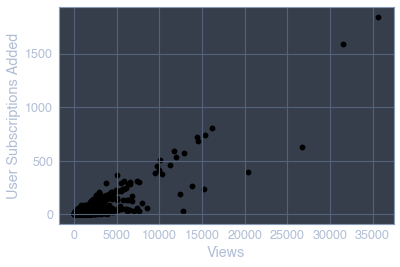

In [35]:
X = Video_df[["Views","User Subscriptions Added"]]
#Visualise data points
plt.scatter(X["Views"],X["User Subscriptions Added"],c='black')
plt.xlabel('Views')
plt.ylabel('User Subscriptions Added')
plt.show()

In [38]:
#number of clusters
K=3

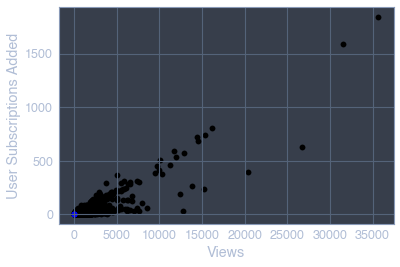

In [39]:
# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["Views"],X["User Subscriptions Added"],c='Black')
plt.scatter(Centroids["Views"],Centroids["User Subscriptions Added"],c='Blue')
plt.xlabel('Views')
plt.ylabel('User Subscriptions Added')
plt.show()

<ipython-input-40-3a301f71252b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
<ipython-input-40-3a301f71252b>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C


183.1645155683932
362.4290129291689
741.2977693613296
720.7188070573882
413.6921791754309
443.49394321115864
631.0623580885297
690.6374760208988
778.0140821166653
929.7238971804546
1082.4170747420494
1458.7036266050468
1789.8336681884794
1469.776283127685
1486.2574123530906
1492.6556815593483
1404.2720336286643
1189.6887076669532
356.6280029665553
359.53631086470085
6.013062412265524
3.018456000550664
1.0244209396082664
0.9975949629351174
0.0


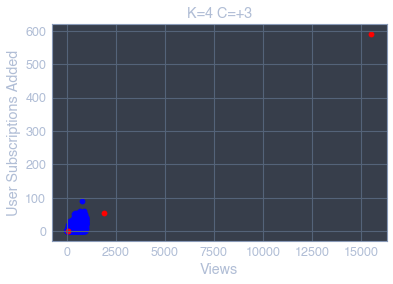

In [40]:
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["Views"]-row_d["Views"])**2
            d2=(row_c["User Subscriptions Added"]-row_d["User Subscriptions Added"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["User Subscriptions Added","Views"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['User Subscriptions Added'] - Centroids['User Subscriptions Added']).sum() + (Centroids_new['Views'] - Centroids['Views']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["User Subscriptions Added","Views"]]
    
color=['blue','green','cyan','yellow','black']
for k in range(K):
    data=X[X["Cluster"]==k+3]
    plt.scatter(data["Views"],data["User Subscriptions Added"],c=color[k])
plt.scatter(Centroids["Views"],Centroids["User Subscriptions Added"],c='red')
plt.title('K=3 C=+3')
plt.xlabel('Views')
plt.ylabel('User Subscriptions Added')
plt.savefig('kmeans9.png', dpi=400)
plt.show()

# K-Nearest Neighbor

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=142)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
prediction_results = knn.predict(X_test[:5,:)
print(prediction_results)

# Linear Regression

In [57]:
df = Video_df.drop(['Date', 'Video Title', 'External Video ID', 'Video Length', 'Thumbnail link',
                   'Video Likes Added', 'Video Dislikes Added', 'Video Likes Removed',
                   'User Subscriptions Removed', 'Average View Percentage', 'Average Watch Time',
                   'User Comments Added'], axis=1)

In [58]:
#Splitting the dataset into independent (x) and dependent (y) variables.
x = df.iloc[:, :-1]
y = df.iloc[:, 1]

In [59]:
x

,Views
0,13
1,2
2,10
3,1
4,1
...,...
111852,2
111853,9
111854,4
111855,13


In [60]:
y

0         0
1         1
2         0
3         0
4         0
         ..
111852    0
111853    0
111854    0
111855    0
111856    0
Name: User Subscriptions Added, Length: 111857, dtype: int64

In [61]:
#Dividing the complete dataset into training and testing dataset.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [63]:
#Implement our classifier based on simple linear regression.
simplelinearRegression = LinearRegression()
simplelinearRegression.fit(x_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression()

In [65]:
y_predict = simplelinearRegression.predict(x_test)
predict = pd.DataFrame(y_predict)
predict.apply(np.round)

,0
0,0.0
1,0.0
2,-0.0
3,-0.0
4,-0.0
...,...
33553,11.0
33554,-0.0
33555,-0.0
33556,20.0


In [66]:
i = 21
while i <= 28:
  print("Total number of increase in subscribers on May %d ==>" %(i) , int(simplelinearRegression.predict([[i]])))
  i= i+1

Total number of increase in subscribers on May 21 ==> 0
Total number of increase in subscribers on May 22 ==> 0
Total number of increase in subscribers on May 23 ==> 0
Total number of increase in subscribers on May 24 ==> 0
Total number of increase in subscribers on May 25 ==> 0
Total number of increase in subscribers on May 26 ==> 0
Total number of increase in subscribers on May 27 ==> 0
Total number of increase in subscribers on May 28 ==> 0
